In [1]:
import requests
import time

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

In [5]:
#address = "0x9a5F32b99c15099b676d9892b47F381E227907A8"
address = "0xc5D182FA66d94398f7e7cD399415FA787Be875DB"

In [6]:
etherKey = "3MD7TT5YKC2GTRBX6JYSWHSJ1UNDWRFJ9Q"

In [7]:
#apiRequest = "https://api.etherscan.io/api?module=account&action=balance&address=" +address+ "&tag=latest&apikey=" + etherKey

In [8]:
apiRequest = "http://api.etherscan.io/api?module=account&action=txlist&address=" +address + "&startblock=0&endblock=99999999&sort=asc&apikey=" + etherKey

In [9]:
r = requests.get(apiRequest)

In [10]:
resultDict = r.json()

In [11]:
resultDict.keys()

[u'status', u'message', u'result']

In [12]:
resultDict['status']

u'1'

In [13]:
len(resultDict['result'])

101

In [14]:
resultDict['result'][1].keys()

[u'nonce',
 u'contractAddress',
 u'cumulativeGasUsed',
 u'hash',
 u'blockHash',
 u'timeStamp',
 u'gas',
 u'txreceipt_status',
 u'value',
 u'blockNumber',
 u'to',
 u'confirmations',
 u'input',
 u'from',
 u'transactionIndex',
 u'isError',
 u'gasPrice',
 u'gasUsed']

In [15]:
resultDict['result'][78]['value']

u'530229000000000000'

In [16]:
resultDict['result'][78]['to'],resultDict['result'][78]['from']

(u'0xc5d182fa66d94398f7e7cd399415fa787be875db',
 u'0xc73780650078a12a69008448dc64d4418b57abe2')

In [17]:
resultDict['result'][78]

{u'blockHash': u'0xc0a01e695013b93709cb97844e562631100182fa8039b4892e5613ea23f1ecb5',
 u'blockNumber': u'5178164',
 u'confirmations': u'524374',
 u'contractAddress': u'',
 u'cumulativeGasUsed': u'583851',
 u'from': u'0xc73780650078a12a69008448dc64d4418b57abe2',
 u'gas': u'21000',
 u'gasPrice': u'41000000000',
 u'gasUsed': u'21000',
 u'hash': u'0x265b81598aebcc66bc34653b6b8c85908816a254de9b33e020712b855b1651f8',
 u'input': u'0x',
 u'isError': u'0',
 u'nonce': u'18',
 u'timeStamp': u'1519921844',
 u'to': u'0xc5d182fa66d94398f7e7cd399415fa787be875db',
 u'transactionIndex': u'13',
 u'txreceipt_status': u'1',
 u'value': u'530229000000000000'}

In [18]:
import datetime
print(
    datetime.datetime.fromtimestamp(
        int(resultDict['result'][78]['timeStamp'])
    ).strftime('%Y-%m-%d %H:%M:%S')
)

2018-03-01 19:30:44


In [28]:
dictTrans = {}


In [20]:
def unixTimeStampToStr(unixTS):
    return datetime.datetime.fromtimestamp(
        int(resultDict['result'][78]['timeStamp'])
    ).strftime('%Y-%m-%d %H:%M:%S')

In [169]:
def getTxList(contractAddr):
    newTxReq = "http://api.etherscan.io/api?module=account&action=txlist&address=" +contractAddr + "&startblock=0&endblock=99999999&sort=asc&apikey=" + etherKey
    #print newTxReq
    try:
        r = requests.get(newTxReq)
    except:
        print "API request error"
    #res = r.json()
    #if res['status']==1:
    #    return res
    #else:
    return r.json()    
        #{"status":"0","message":"Query Timeout occured. Please select a smaller result dataset","result":null}
    

In [170]:
contractsFlow = []

In [171]:
def createNodeCallNext():
    return node

In [172]:
def fillNode(selfAddress, parentAddress, direction):
    global contractsFlow
    tmpDict = {}
    tmpDict['selfAddress'] = selfAddress
    tmpDict['parentAddress'] = parentAddress
    tmpDict['direction'] = direction
    contractsFlow.append(tmpDict)
    return None

In [173]:
def walkTxTree1(txList, selfAddress, parentAddress, level, direction):
    global counter
    global transLim
    fillNode(selfAddress, parentAddress, direction)
    nextBranch = None
    if counter > 500:
        return None
    if level > 1:
        return None
    if txList:
        numRowsChecked = 0
        for tx in txList:
            numRowsChecked += 1
            #print "tx from: {}, tx: to {}, selfaddress: {}".format(tx['from'],tx['to'],selfAddress)
            counter = counter + 1
            time.sleep(1)
            if tx['from'].lower()==tx['to'].lower():
                direction = 'self'
                fillNode(selfAddress, selfAddress, direction)
            else:
                if tx['from'].lower() == selfAddress:
                    direction = "to"
                    nextBranch = tx[direction]
                    print direction, nextBranch
                else:
                    if tx['to'].lower() == selfAddress:
                        direction = "from"
                        nextBranch = tx[direction]
                        print direction, nextBranch
                if nextBranch:
                    #print "entered next branch"
                    newTxList = getTxList(nextBranch)
                    if 'result' in newTxList.keys():
                        #print "counter: {}".format(counter)
                        walkTxTree1(newTxList['result'],nextBranch.lower(), selfAddress, level+1, direction)  
                        numRowsChecked +=1
                    else:
                        tmpDict['parentAddress'] = selfAddress
                        tmpDict['direction'] = direction
                        contractsFlow.append(tmpDict)
                        fillNode(nextBranch, selfAddress, direction)
                    if numRowsChecked>10:
                        break

        else:
            return None
    return None

In [174]:
address = "0xc5D182FA66d94398f7e7cD399415FA787Be875DB"
resultDict = getTxList(address)

In [175]:
#resultDict['result'][:10]

In [176]:
%%time

counter = 0
contractsFlow = []
transLim = 2
walkTxTree1(resultDict['result'], address.lower(), 0x0000, 0, 'root')

from 0xf2c75ca0e3b4c861e388c34aeb60e1b253881fda
from 0xceb3fb17e229410e27fb74a253e4d2adfd9215af
from 0x79dd552fdb2077ad901cd2234d20a1f5a6f5f657
to 0xc5d182fa66d94398f7e7cd399415fa787be875db
to 0x509d999be06482f3694c1dd4597a0abbf5862ac2
to 0x636371ed32d0ff9deb5f3b5f993b4acea6aa23cf
from 0x0ba4fe9372b1d65009b9c2e612c843da175044c6
from 0xf93c86302b8e2660f2c598bc644e713bb3bcd6da
to 0xc5d182fa66d94398f7e7cd399415fa787be875db
to 0x6e95c8e8557abc08b46f3c347ba06f8dc012763f
from 0xc5d182fa66d94398f7e7cd399415fa787be875db
from 0xb505da55c822b3df9ac49bcd930797175d14e0a5
to 0xfb09e0b0744d7136dec2d9dad0aae9f027630dd9
from 0xe475283647d0d99c851329c18f1046fce25856a9
to 0xe475283647d0d99c851329c18f1046fce25856a9
from 0xc5d182fa66d94398f7e7cd399415fa787be875db
to 0xbaa71fd612eb1992874eb452f397ef481cbe1de7
to 0xbaa71fd612eb1992874eb452f397ef481cbe1de7
from 0xe475283647d0d99c851329c18f1046fce25856a9
to 0x0ba4fe9372b1d65009b9c2e612c843da175044c6
from 0xf93c86302b8e2660f2c598bc644e713bb3bcd6da
to 0xc5d182f

In [177]:
transDF = pd.DataFrame(contractsFlow)

In [178]:
transDF.head()

,direction,parentAddress,selfAddress
0,root,0,0xc5d182fa66d94398f7e7cd399415fa787be875db
1,from,0xc5d182fa66d94398f7e7cd399415fa787be875db,0xf2c75ca0e3b4c861e388c34aeb60e1b253881fda
2,from,0xf2c75ca0e3b4c861e388c34aeb60e1b253881fda,0xceb3fb17e229410e27fb74a253e4d2adfd9215af
3,from,0xf2c75ca0e3b4c861e388c34aeb60e1b253881fda,0x79dd552fdb2077ad901cd2234d20a1f5a6f5f657
4,to,0xf2c75ca0e3b4c861e388c34aeb60e1b253881fda,0xc5d182fa66d94398f7e7cd399415fa787be875db


In [179]:
transDF.shape

(42, 3)

In [112]:
transDFByDir = transDF.groupby('direction')

In [147]:
Gs = []
edges = {}

In [148]:
for name, group in transDFByDir:
    if name != 'self':
        G = nx.DiGraph()
        for index, row in group.iterrows():
            G.add_edge(row['parentAddress'], row['selfAddress'])
        print len(G.edges())
        edges[name] = G.edges()
        Gs.append(G)
    #print name
G = None

14
1
16


In [149]:
gFull = nx.DiGraph()
for g in Gs:
    gFull = nx.compose(gFull, g) 

In [150]:
#gFull.edges()

In [151]:
for edgeType in edges.keys():
    print edgeType

root
from
to


In [160]:
#assign colors for edges
edgeColors = {}
edgeColors['from'] = 'b'
edgeColors['to'] = 'g'
edgeColors['root'] = 'r'

In [161]:
#transDF.drop_duplicates(subset = ['parentAddress', 'selfAddress', 'direction']).shape

In [162]:
#G = nx.DiGraph()
#i = 0
#for index, row in transDF.iterrows():
#    G.add_edge(row['parentAddress'], row['selfAddress'])
#    i+=1
#print i

In [163]:
#transDF.drop_duplicates(subset = ['parentAddress', 'selfAddress', 'direction'])

In [164]:
#pos=graphviz_layout(gFull, prog='dot')
pos=graphviz_layout(gFull, prog='twopi', root = 0)

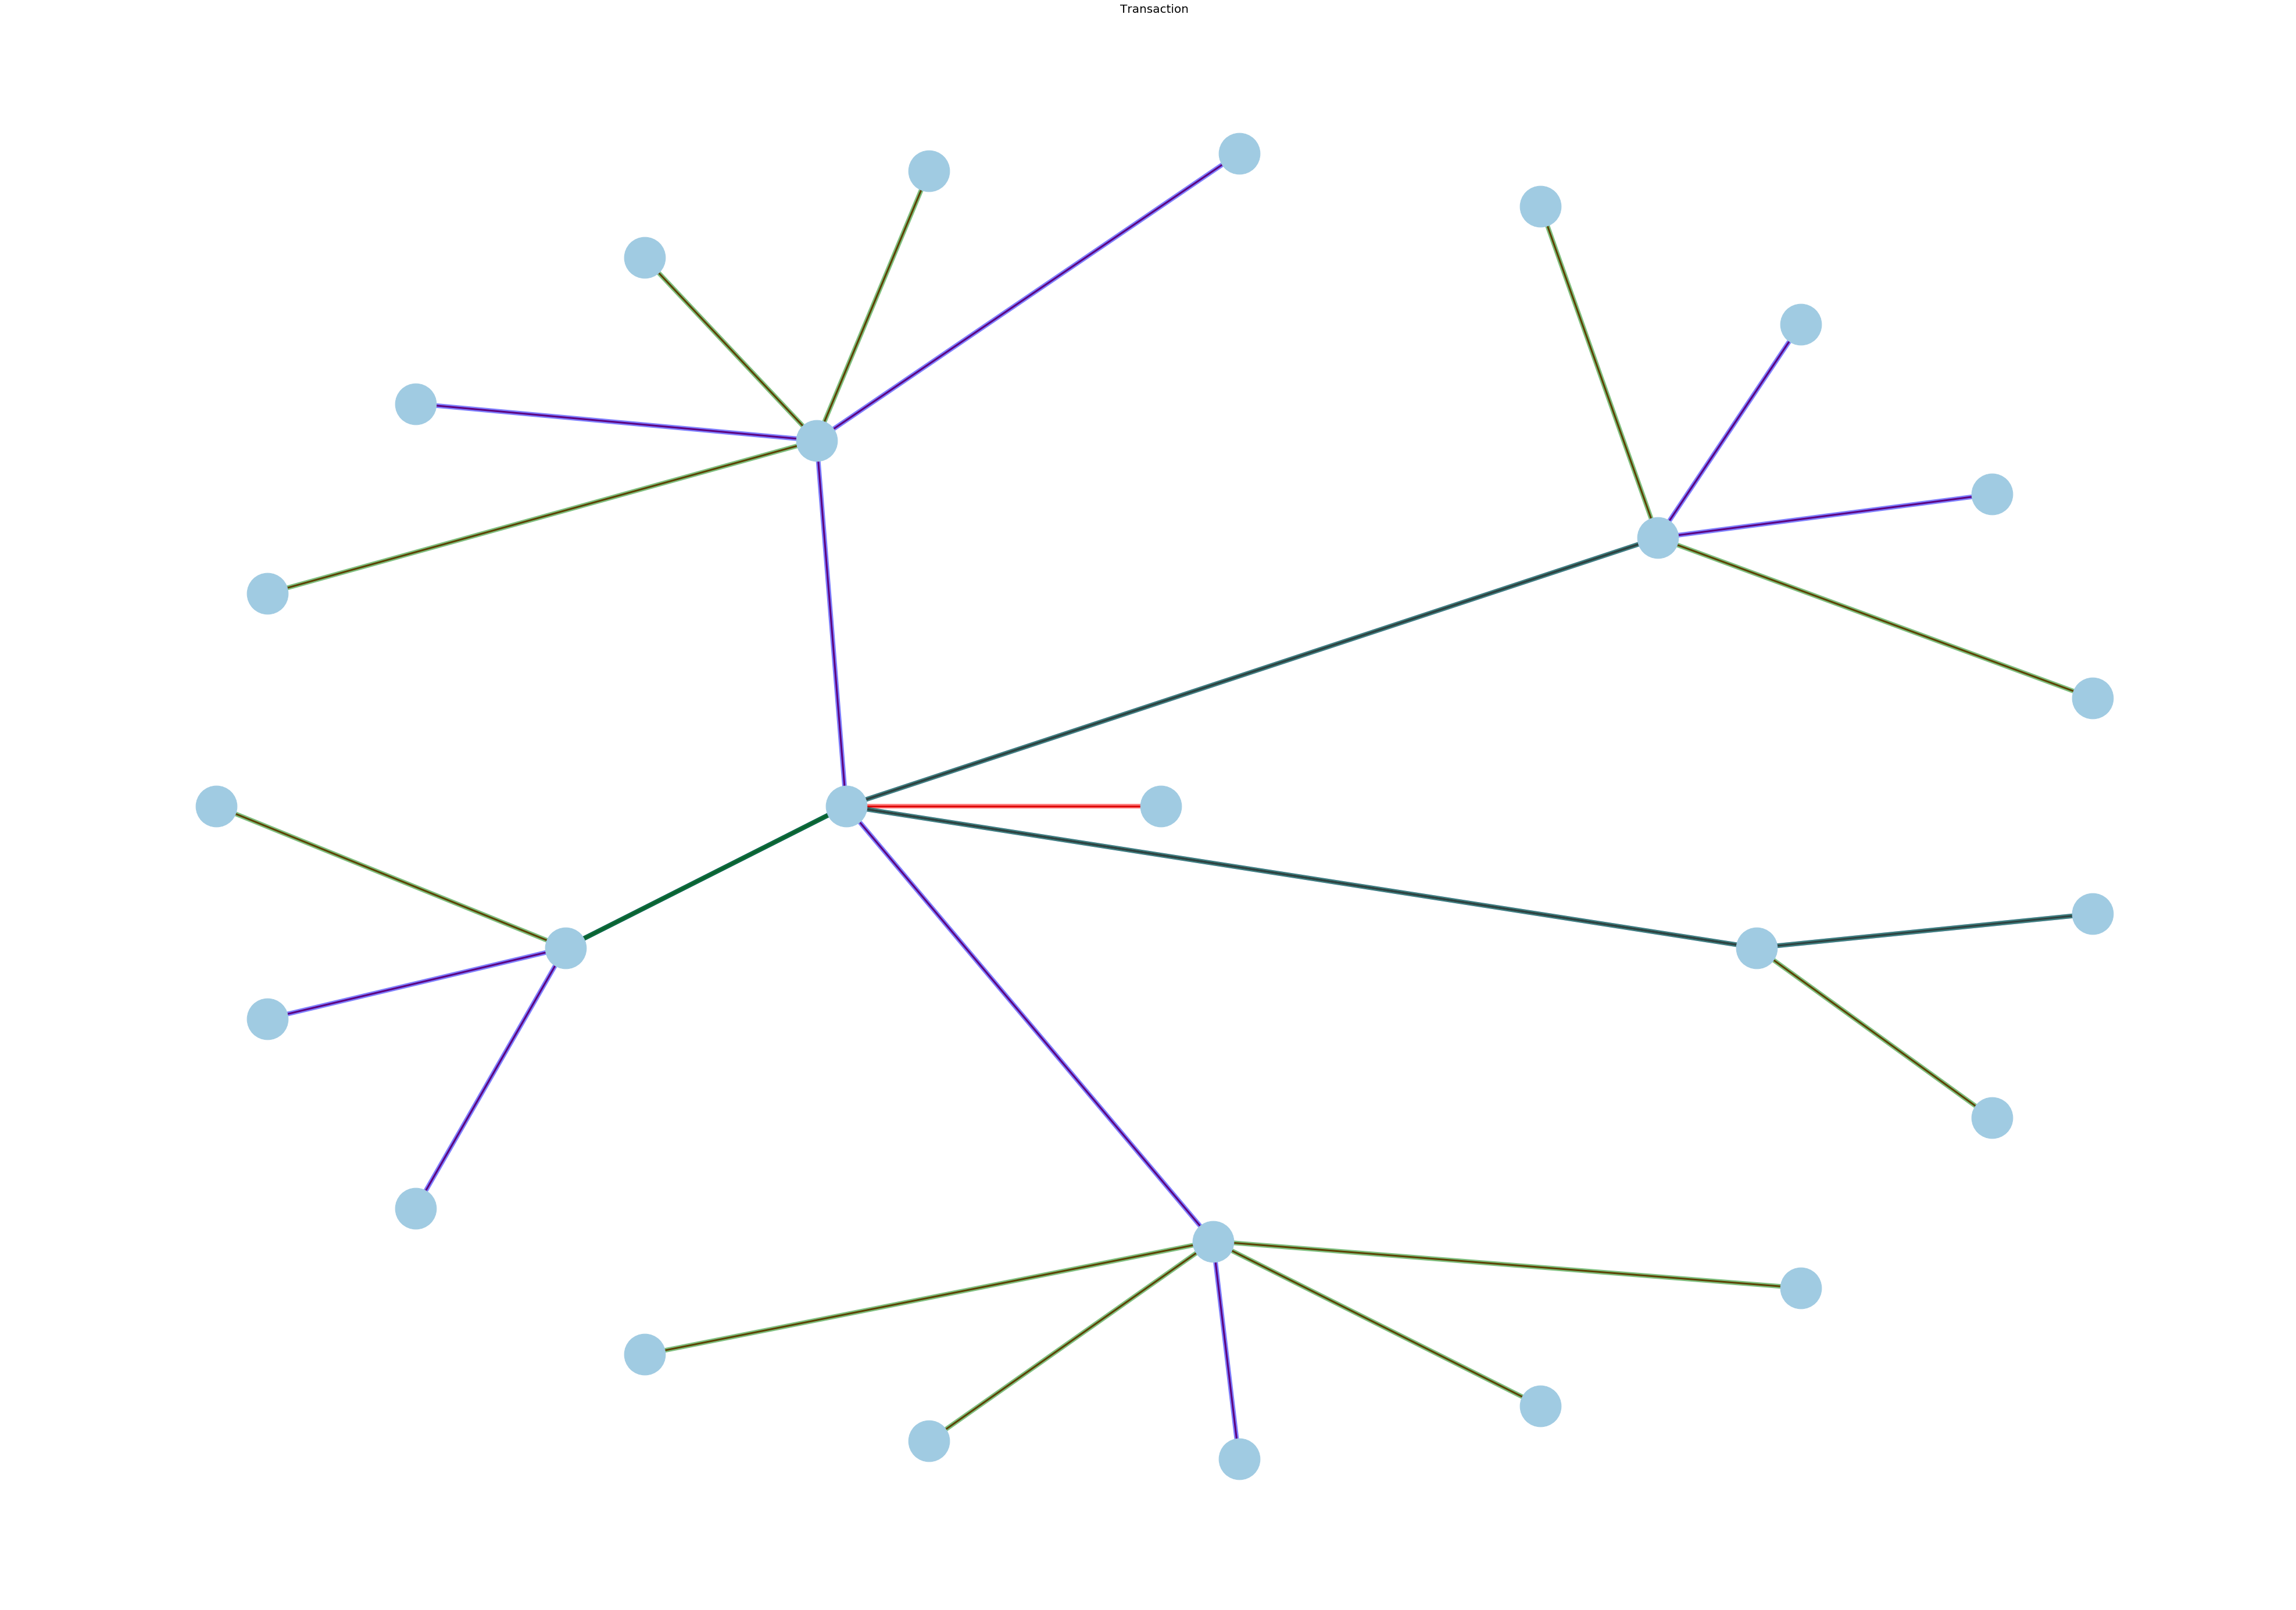

In [165]:
plt.figure(1, figsize = (70,50))
plt.title(u'Transaction', fontsize=20)
   
#plt.axhline(y=pos['0'][1], xmax = 1, color = '#cccccc')
#plt.annotate('level ', xy=(10, pos['0'][1]), xytext=(10, pos['0'][1]+5), fontsize=16)

#pos=graphviz_layout(G, prog='dot')

nx.draw(gFull, pos, node_color='#A0CBE2',edge_color='#BB0000',width=3, arrows=False, node_size=5000,font_size=18)
for edgeType in edges.keys():
    #print edgeType
    nx.draw_networkx_edges(gFull,pos,edgelist=edges[edgeType], width=8,alpha=0.5,arrows=False, edge_color=edgeColors[edgeType])
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edgeLabels, label_pos=0.5, \
#                          font_size=15, font_color='k', font_family='sans-serif', font_weight='normal', \
#                          alpha=1.0, bbox=None, ax=None, rotate=True);
#
#plt.show()
#plt.savefig('nx_test.png')